Regression Tests
---

import of libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
%matplotlib inline

I can generate random numbers, just like in the exercises before with the function random.rand() and save them to the variable **x**

I also multiply **x** by a factor and add an offset --> I get a linear function in **y**

In [6]:
#np.random.seed(0)
x=10*np.random.rand(20,1)   # uniform distributed samples zwischen [0,10]

y=6.3*x+15

to display the linear function $y=f(x)=b_1 \cdot x+b_0$ I plot the points:

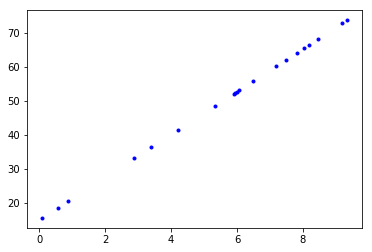

In [7]:
plt.plot(x,y,'b.')
plt.show()

all points alligned and very regular because of the linear connection,
to make this dataset a little bit more realistic I add some random errors by...

In [9]:
y=y+5*np.random.randn(20,1)

and plot it again:

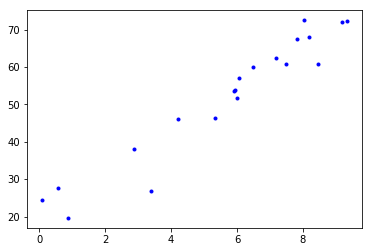

In [10]:
plt.plot(x,y,'b.')
plt.show()

In the same way I designed the linear dataset I can also define a quadratic function **yq** and also add some random errors by:

In [11]:
yq = 3*x*x + 4*x + 7
yq=yq+15*np.random.randn(20,1)
#print x,y

#x=np.ravel(x)
#y=np.ravel(y)


we can plot both datasets together:

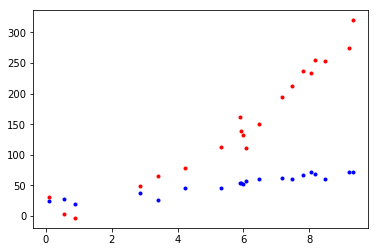

In [12]:
plt.plot(x,y,'b.',x,yq,'r.')
plt.show()


Now I have two datasets a linear and non-linear one, but what could such data describe?

A linear dataset could be for example

A quadratic (non-linear) dataset can be for example

Apply a regression to the data by polynomial fitting 
---

Regression is a tool to **deduct** from a sampled dataset to a general **circumstances** in the data. In other words I want to know which value I can expect at the positions where I wasn't able to measure...



For a linear function like a line kann der Zusammenhang der Größen y (abhängige Variable, vertikale Achse) und x (unabhängige Variable, horizontale Achse) wie folgt ausgedrückt werden: $ y = f(x) = b_0 + b_1 x $




With this equation for every value-pair $(x_i, y_i)$ with $i=1...n$ an equation can be generated. From the $n$ measured values and therefor $n$ functional equations two parameters should be estimated. In the concrete case of $n = 6$ the  functional equations look like this:

$ y_1 = b_0 + b_1 x_1 \Longrightarrow  0.7 = b_0 + b_1 \cdot 0$ 

$ y_2 = b_0 + b_1 x_2 \Longrightarrow  0.5 = b_0 + b_1 \cdot 1$ 

$ y_3 = b_0 + b_1 x_3 \Longrightarrow  3.9 = b_0 + b_1 \cdot 2$ 

$ y_4 = b_0 + b_1 x_4 \Longrightarrow  3.2 = b_0 + b_1 \cdot 3$ 

$ y_5 = b_0 + b_1 x_5 \Longrightarrow  6 = b_0 + b_1 \cdot 4$ 

$ y_6 = b_0 + b_1 x_6 \Longrightarrow  8 = b_0 + b_1 \cdot 5$ 


the following Vectors can be assigned based on that:

$\vec x^T= [x_1, x_2, ..., x_n]$ and $\vec y^T= [y_1, y_2, ..., y_n]$  as well as $\vec b^T= [b_0, b_1]$ 

In the example $ \vec x^T =[0,1,2,3,4,5 ]$, $\vec y^T=[0.7 , 0.5 , 3.9 , 3.2 , 6.8 ]$ and I'm looking for the values of $\vec b^T$.


But in general the function $y = b_0 + b_1 \cdot x $ is not realy correct, because in every meassured point a little error-value **$\epsilon$** has to be added to the functional value (e.g. Theory of error propagation ...)

Therefore it makes sense to extend the functional Zusammenhang and to write it like this:

$y = b_0 + b_1 x + \epsilon$

if I ... this equation to $\epsilon$, I get a function of the measuring errors.

$\epsilon = y - b_0 - b_1 x $

This function only depends on the measured data:
$\epsilon =\epsilon(b_0,b_1) = y - b_0 - b_1 x $

That's why for all meassured points $(x_i,y_i)$ the individual error $\epsilon_i$ can be calculated by:

$\epsilon_i = y_i - b_0 - b_1 x_i $ which is also called the L2-Norm :$l_2(f_{\theta}(x_i),y_i)=( y_i - f_{\theta}(x_i) )^2$



Die Überlegung an dieser Stelle ist nun den Fehler über alle Messpunkte zu minimieren. Die Idee die quadratischen Fehler aufzusummieren und das Minimum dieser Summe zu suchen geht auf Carl Friedrich Gauss (ca. 1795) und Adrien-Marie Legendre (ca. 1806) zurück und ist unter dem Namen \textbf{Methoder der kleinsten Quadrate} oder \textbf{Least Squares Method}/ \textbf{Méthode des moindres carrés} bekannt geworden. Gauss fand durch seine Überlegungen zur Normalverteilung heraus, das Messfehler in jeder Messung zufällig verteilt sein können und damit das Messergebnis in unerwünschter Weise verkleiner ($\epsilon_i$ negativ) bzw. vergrößern ($\epsilon_i$ positiv) können. Den Quadratischen Fehler zu untersuchen ist also im Grunde eine Worst-Case Abschätzung.


The aim is now to minimize the sum of the quadratic error,

$\sum (\epsilon_i)^2 \rightarrow $ Min


to find a minimum of a function its fist derivative has to be set to zero. Therefor a calculate the fist derivative
regarding both of the variables

$\frac{\partial \sum (\epsilon_i)^2}{\partial b_0 }$ and $\frac{\partial \sum (\epsilon_i)^2}{\partial b_1 }$:

$\frac{\partial \sum (\epsilon_i)^2}{\partial b_0 } = \frac{\partial \sum (y_i - b_0 - b_1 x_i)^2}{\partial b_0 }= -2 \sum(y_i - b_0 - b_1 x_i)=0 $

$\frac{\partial \sum (\epsilon_i)^2}{\partial b_1 } = \frac{\partial \sum (y_i - b_0 - b_1 x_i)^2}{\partial b_1 }= -2 \sum(y_i - b_0 - b_1 x_i) \cdot x_i=0 $ 

The factor -2 can be ignored and the Sum-equations can be changed to:

$  \sum y_i =  \sum b_0 + \sum b_1 x_i $

$  \sum y_i x_i =  \sum b_0 x_i + \sum b_1 x_i^2 $

These two equations are called the **Normal-equations**

writing these equations in a matrix syntax leads to 

$
\begin{bmatrix}
1&...&1\\
x_1&...&x_n
\end{bmatrix}
$
$
\begin{bmatrix}
y_1\\
:\\
y_n
\end{bmatrix}
$=
$
\begin{bmatrix}
n& \sum x_i\\
\sum x_i&\sum x_i^2
\end{bmatrix}
$
$\begin{bmatrix}
b_0\\
b_1
\end{bmatrix}$

and 

$
\begin{bmatrix}
1&...&1\\
x_1&...&x_n
\end{bmatrix}
$
$
\begin{bmatrix}
y_1\\
:\\
y_n
\end{bmatrix}
$=
$
\begin{bmatrix}
1&...&1\\
x_1&...&x_n
\end{bmatrix}
$
$
\begin{bmatrix}
1&x_1\\
: & :\\
1&x_n
\end{bmatrix}
$
$\begin{bmatrix}
b_0\\
b_1
\end{bmatrix}
$

I call the matrix 
A = $
\begin{bmatrix}
1&x_1\\
: & :\\
1&x_n
\end{bmatrix}
$
the **Design-Matrix** of the regression problem

I call the Vector $ \vec b =\begin{bmatrix}
b_0\\
b_1
\end{bmatrix}
$  the parameter vector which shall be estimated


und the Vector $ \vec y = 
\begin{bmatrix}
y_1\\
:\\
y_n
\end{bmatrix}
$ the observations

the equation above can be written like this

$A^T \vec y = A^T A \vec b$


$\vec b =( A^T A )^{-1} A^T \vec y$


In [16]:
A1=np.zeros((20,2))
A1[:,0]=1
A1[:,1]=np.ravel(x)
print(A1)

[[ 1.          5.89761504]
 [ 1.          8.46426962]
 [ 1.          9.32177444]
 [ 1.          7.80925012]
 [ 1.          5.92782148]
 [ 1.          0.56586926]
 [ 1.          0.08290134]
 [ 1.          8.04188457]
 [ 1.          8.18478808]
 [ 1.          6.47493117]
 [ 1.          5.98669222]
 [ 1.          0.87169683]
 [ 1.          5.31884275]
 [ 1.          2.86954635]
 [ 1.          3.3965787 ]
 [ 1.          7.17093238]
 [ 1.          7.47343675]
 [ 1.          9.19747287]
 [ 1.          4.21256742]
 [ 1.          6.06323317]]


In [ ]:
A1

In [ ]:
b1=np.dot(np.linalg.inv(np.dot(A1.T,A1)),np.dot(A1.T,y))

In [ ]:
b1

In [ ]:
s,p=np.polyfit(x,y,1)

In [ ]:
print 'polyfit:     Steigung: {} und y-Schnittpunkt: {}'.format(s,p)
print 'eigene Ber.: Steigung: {} und y-Schnittpunkt: {}'.format(b1[1],b1[0])

Quadratic Function 
---

In [ ]:
A2=np.zeros((20,3))
A2[:,0:2]=A1
A2[:,2]=x*x

In [ ]:
A2

In [ ]:
b2=np.dot(np.linalg.inv(np.dot(A2.T,A2)),np.dot(A2.T,y))

In [ ]:
b2

In [ ]:
coos=np.polyfit(x,y,2)

In [ ]:
coos

In [ ]:
print 'polyfit:     b^2: {}   b^1: {} und b^0: {}'.format(coos[0],coos[1],coos[2])
print 'eigene Ber.: b^2: {}   b^1: {} und b^0: {}'.format(b2[2],b2[1],b2[0])

make the Plots
---

In [ ]:
xvals=np.arange(0,20,0.1)

In [ ]:
yvals=coos[0]*(xvals*xvals)+coos[1]*xvals+coos[2]

In [ ]:
plt.plot(x,y,'b.')
plt.plot(xvals,s*xvals+p,'g',label='Linear Fit')
plt.plot(xvals,yvals,'r',label='Quadr. Fit')
plt.xlim(0,20)
plt.ylim(0,150)
plt.legend(loc='best')
plt.show()